In [2]:
from scipy.io import loadmat
import numpy as np
import soundfile as sf
import warnings
warnings.filterwarnings('ignore')


In [4]:
data_signal = loadmat(r"/Users/luchengliang/ML_sp/Assignment/problem_set_2_data/problem2_5_signal.mat")
s = data_signal['signal']
print(s)
print(len(s))
type(s)

[[ 1.42568267e-04]
 [ 5.79956898e-04]
 [-1.99840488e-05]
 ...
 [ 9.92264989e-02]
 [-5.31490997e-01]
 [-8.65684594e-01]]
32000


numpy.ndarray

In [5]:
data_noise = loadmat(r"/Users/luchengliang/ML_sp/Assignment/problem_set_2_data/problem2_5_noise.mat")
omega = data_noise['noise']
print(omega)
print(len(omega))
type(omega)

[[-0.20498159]
 [-0.0227513 ]
 [-0.33508778]
 ...
 [ 0.06126691]
 [-0.1530099 ]
 [-0.25024435]]
32000


numpy.ndarray

In [6]:
if s.ndim > 1:
    s_signal = np.squeeze(s)
    
sampling_rate = 8000

sf.write('2_5_signal.wav', s_signal, sampling_rate, subtype='PCM_24')

if omega.ndim > 1:
    noise_signal = np.squeeze(omega)
    
sampling_rate = 8000

sf.write('2_5_noise.wav', noise_signal, sampling_rate, subtype='PCM_24')

In [42]:
x = np.add(s, omega)
print(x.shape)
x

(32000, 1)


array([[-0.20483902],
       [-0.02217135],
       [-0.33510776],
       ...,
       [ 0.16049341],
       [-0.6845009 ],
       [-1.11592894]])

In [16]:
import numpy as np
from scipy.linalg import toeplitz
from scipy.signal import wiener
from scipy import signal
import matplotlib.pyplot as plt

In [17]:
def xcorr(x, y, k):
    N = min(len(x),len(y))
    r_xy = (1/N) * signal.correlate(x,y,'full') # reference implementation is unscaled
    return r_xy[N-k-1:N+k]

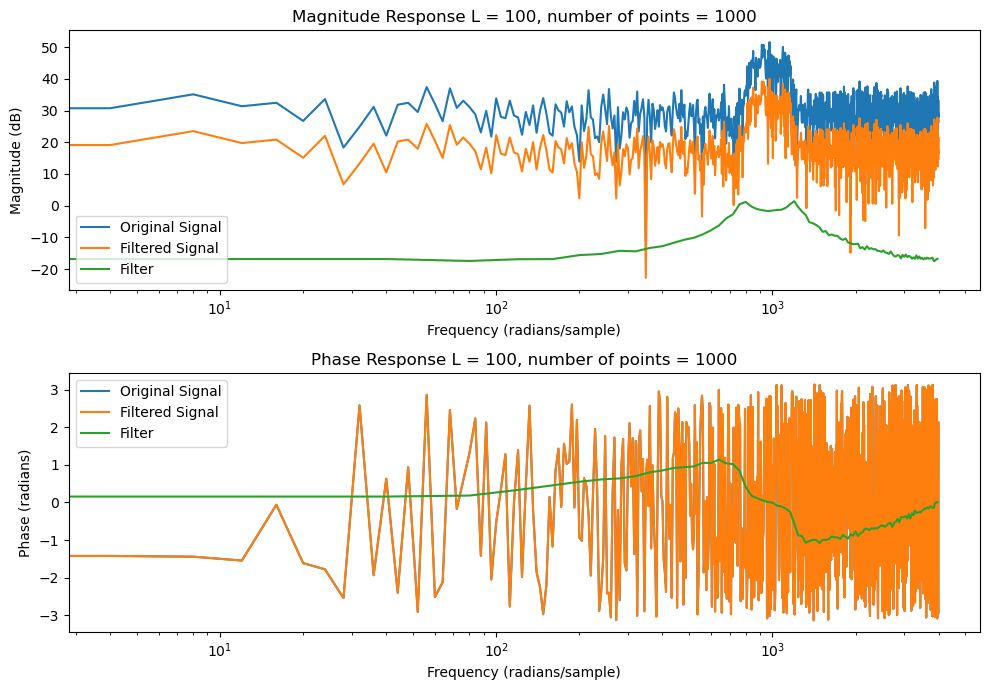

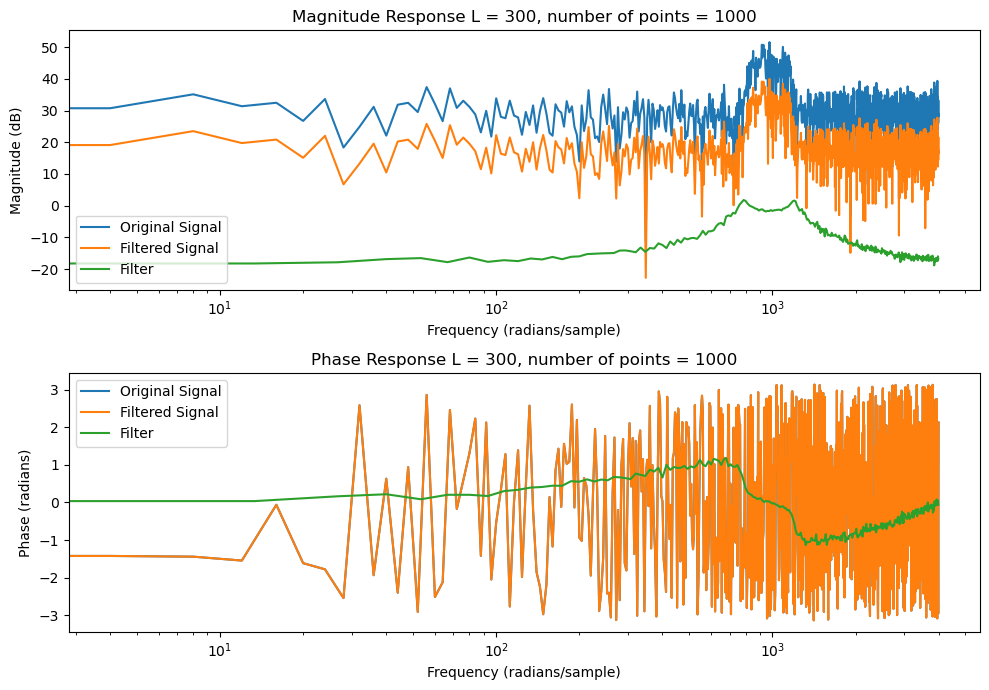

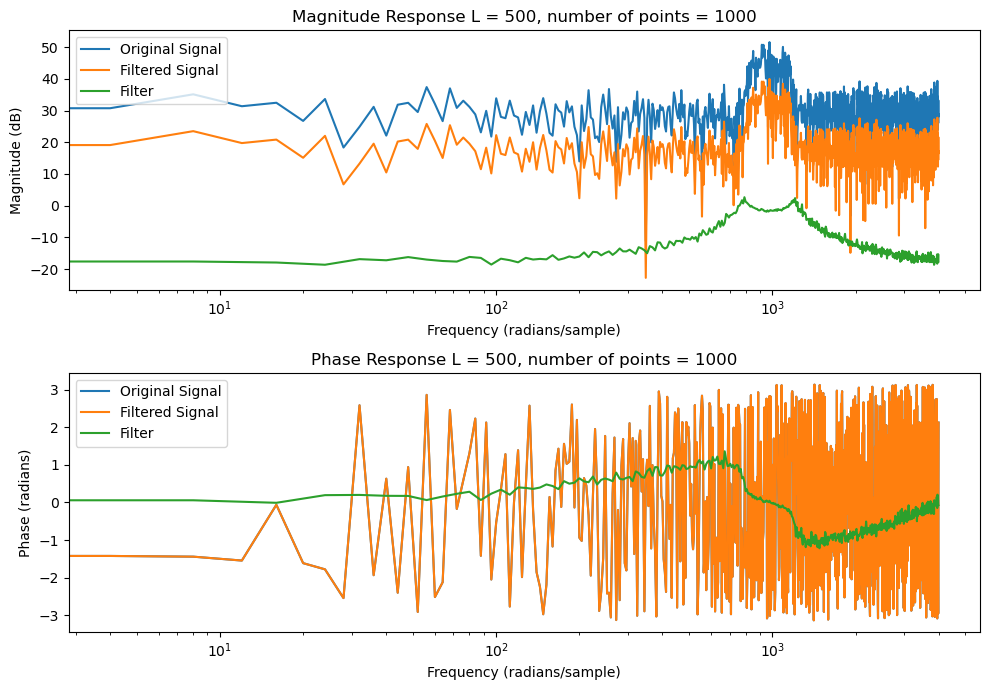

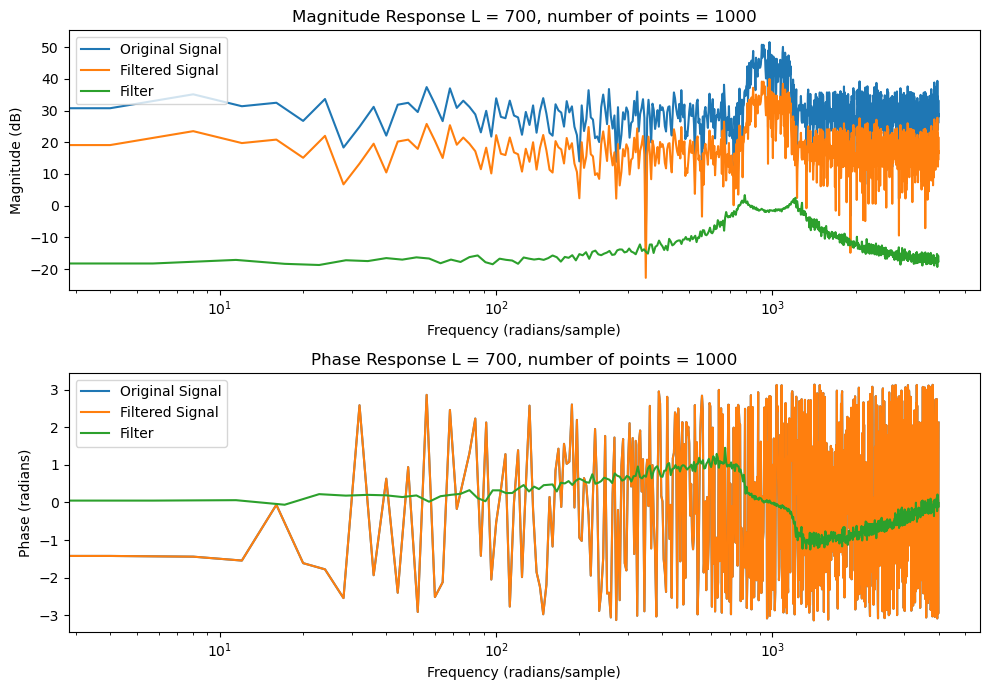

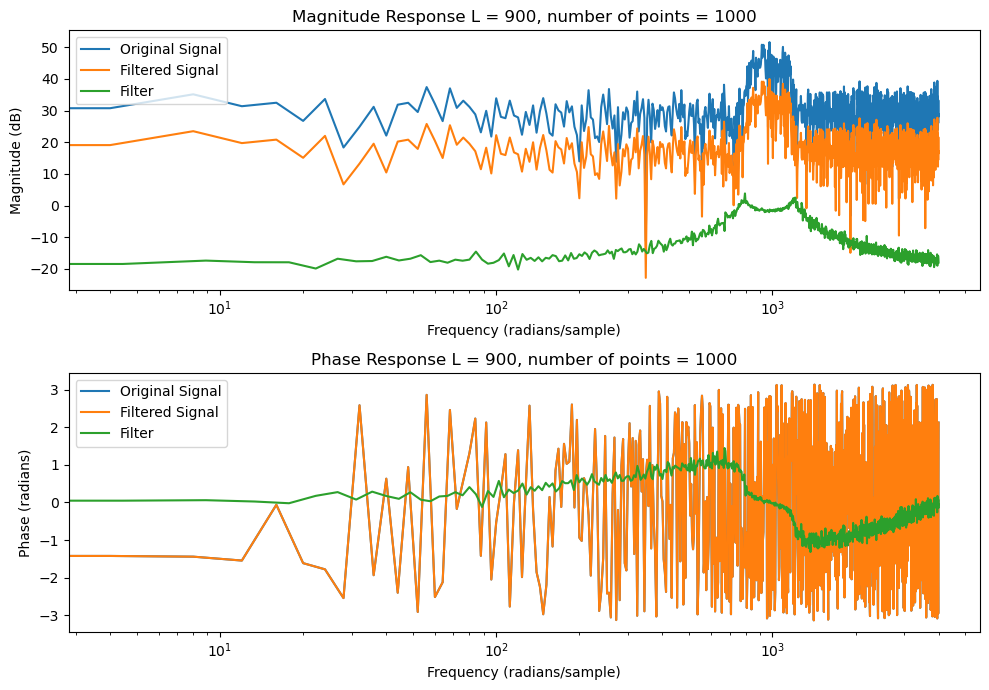

In [93]:
# Filter length
L_op = np.arange(100, 1000, 200)
num_points = 1000
for i in range(len(L_op)):
    # Compute Wiener filter
    L = L_op[i]
    r_uu = xcorr(x, x, L-1)
    R_uu = toeplitz(r_uu[L-1:])
    r_du = xcorr(s, x, L-1)
    theta = np.linalg.solve(R_uu, r_du[L-1:])
    theta = theta.ravel()

    #Filter noisy signal
    dhat = signal.lfilter(theta, 1, x) 
    
    # Compute frequency responses
    freq_ori, H_x = signal.freqz(x, worN=num_points, fs=8000)
    freq_dhat, H_dhat = signal.freqz(dhat, worN=num_points, fs=8000)
    freq_theta, H_theta = signal.freqz(theta, worN=L, fs=8000)

    # Plot the magnitude and phase responses
    plt.figure(figsize=(10, 7))
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_ori, 20 * np.log10(np.abs(H_x)), label='Original Signal')
    plt.semilogx(freq_dhat, 20 * np.log10(np.abs(H_dhat)), label='Filtered Signal')
    plt.semilogx(freq_theta, 20 * np.log10(H_theta), label='Filter')
    plt.title('Magnitude Response L = {0}, number of points = {1}'.format(L, num_points))
    plt.xlabel('Frequency (radians/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.semilogx(freq_ori, np.angle(H_x), label='Original Signal')
    plt.semilogx(freq_dhat, np.angle(H_dhat), label='Filtered Signal')
    plt.semilogx(freq_theta, np.angle(H_theta), label='Filter')
    plt.title('Phase Response L = {0}, number of points = {1}'.format(L, num_points))
    plt.xlabel('Frequency (radians/sample)')
    plt.ylabel('Phase (radians)')
    plt.legend()

    plt.tight_layout()
    plt.show()